<h1><center>Movie Recommender System</center></h1>
by

## Team_JM5

- Olamide Oladipupo
- Nnamdi Isichei
- Kehinde Orimoloye
- John Lawal
- Joshua Olalemi
- Duncan Okoth

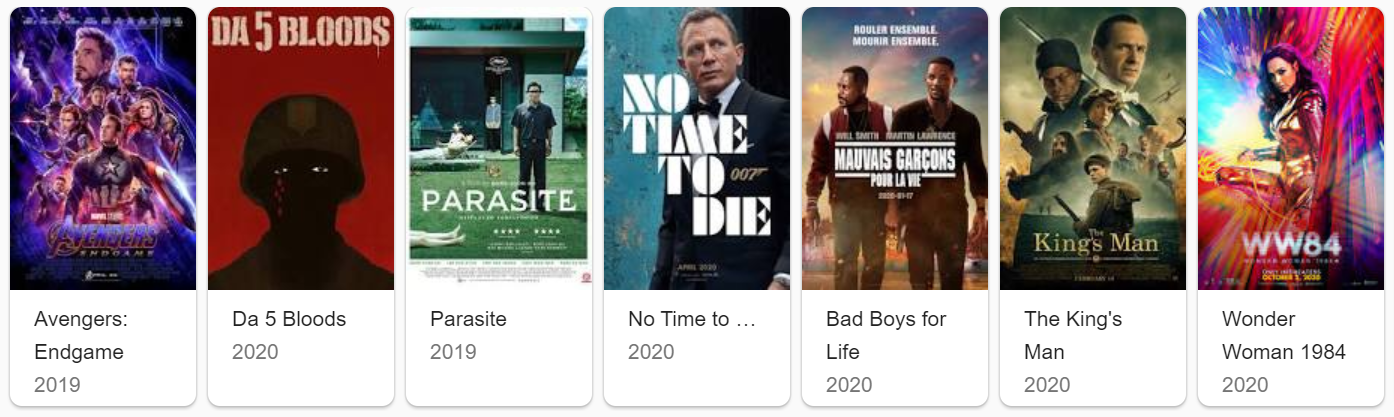

# Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1. [Problem Statement](#problem_statement) <br>
    1.2. [Importing Libraries](#importing_libraries) <br>
    1.3. [Data Description](#data) <br>
    1.4. [Loading Data](#loading_data) <br><br>
    
2. [Data Preprocessing](#preprocessing) <br>
    2.1 [Preprocessing 1](#null_entries) <br>
    2.2 [Preprocessing 2](#empty_strings) <br>
    2.3 [Preprocessing 3](#user_handles) <br>
    2.4 [Preprocessing 4](#urls) <br>
    2.5 [Preprocessing 5](#punctuations) <br>
    2.6 [Preprocessing 6](#stopwords) <br><br>

3. [Exploratory Data Analysis](#EDA) <br>
    3.1 [EDA](#wordcloud) <br><br>
   
4. [Modeling](#model) <br>
    4.1 [Modeling 1](#imbalancedata) <br>
     <font color=white>.....</font>4.1.1. [Algorithm 1](#withoutresample) <br>
     <font color=white>.....</font>4.1.2. [Algorithm 2](#upsample) <br>
     <font color=white>.....</font>4.1.3. [Algorithm 3](#downsample) <br>
     <font color=white>.....</font>4.1.4. [Algorithm 4](#smote) <br>
    4.2 [Model Evaluation](#modeltraining) <br>
     <font color=white>.....</font>4.2.1. [Evaluation 1](#logisticregression) <br>
     <font color=white>.....</font>4.2.2. [Evaluation 2](#naivebayes) <br>
     <font color=white>.....</font>4.2.3. [Evaluation 3](#linearsvc) <br><br>
    
5. [Conclusion and Recommendation](#conclusion_and_recommendation) <br>
    5.1 [Conclusion](#conclusion) <br>
    5.2 [Recommendation](#recommendation) <br><br>

6. [References](#references) <br>

## 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

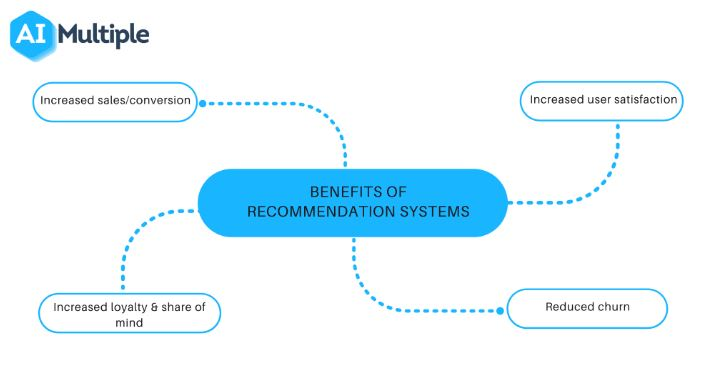

### 1.1 Problem Statement<a id="problem_statement"></a>
[Table of Contents](#contents)

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

### 1.2 Importing Libraries <a id="importing_libraries"></a>
[Table of Contents](#contents)

In [7]:
# import comet_ml
from comet_ml import Experiment

"""
# Create an experiment with your api key
experiment = Experiment(
    api_key="",
    project_name="",
    workspace="",
)
"""

'\n# Create an experiment with your api key\nexperiment = Experiment(\n    api_key="",\n    project_name="",\n    workspace="",\n)\n'

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Configurations
pd.set_option('display.max_colwidth', 600)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from datetime import datetime
import scipy as sp
import plotly.graph_objects as go
from time import time
from time import sleep
import gc
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import datetime
import re
import squarify

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import operator  
import heapq
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

from surprise import SVD, BaselineOnly, CoClustering, NMF
from surprise.model_selection import cross_validate
from surprise import NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline

from libreco.data import random_split, DatasetPure, DataInfo
from libreco.data import split_by_ratio_chrono, DatasetFeat
from libreco.algorithms import SVD as libSVD
from libreco.algorithms import SVDpp, BPR
from libreco.algorithms import FM, WideDeep, DeepFM, AutoInt, DIN
from libreco.evaluation import evaluate

import warnings
warnings.filterwarnings("ignore")

### 1.3 Data Description<a id="data"></a>
[Table of Contents](#contents)

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.


#### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB


#### Supplied Files
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

### 1.4 Loading Data<a id="loading_data"></a>
[Table of Contents](#contents)

In [9]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
# Load dataset using pandas
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
tags = pd.read_csv('datasets/tags.csv')
movies = pd.read_csv('datasets/movies.csv')
links = pd.read_csv('datasets/links.csv')
imdb_data = pd.read_csv('datasets/imdb_data.csv')
genome_tags = pd.read_csv('datasets/genome_tags.csv', encoding= 'unicode_escape')
genome_score = pd.read_csv('datasets/genome_scores.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

In [11]:
train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [12]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [13]:
print(f'movies shape: {movies.shape} , train shape: {train.shape}')

movies shape: (62423, 3) , train shape: (10000038, 4)


In [14]:
print(f'Unique Rating: {train.rating.unique()}')

Unique Rating: [4.  4.5 5.  2.  3.  1.  3.5 2.5 0.5 1.5]


In [15]:
genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [16]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [17]:
genome_score.head()

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

In [18]:
genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [19]:
train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [21]:
test.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [23]:
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [24]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [25]:
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [26]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


## 2. Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

### 2.1 Pre-processing 1 <a id="null_entries"></a>
[Table of Contents](#contents)

In [27]:
#Merge movies and train tables
data = pd.merge(train , movies, on = 'movieId')
data.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1  Comedy|Crime|Drama|Thriller  
2  Comedy|Crime|Drama|Thriller  
3  Comedy|Crime|Drama|Thriller  
4  Comedy|Crime|Drama|Thriller

### 2.2 Pre-processing 2<a id="empty_strings"></a>
[Table of Contents](#contents)

In [28]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
data['rating_year'] = data['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
data.drop('timestamp', axis=1, inplace=True)
data.iloc[0]

userId                                5163
movieId                              57669
rating                                 4.0
title                     In Bruges (2008)
genres         Comedy|Crime|Drama|Thriller
rating_year                           2018
Name: 0, dtype: object

In [ ]:
# Function that displays multiple dataframes in one cell
def data_overview(dataframe_list, column_names=[]):

    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list)
                    +'</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)  

In [ ]:
# Display the overview of train, test, links and tags dataframes
data_overview([train.head(), test.head(), links.head(), tags.head()], 
              column_names=['Train','Test','Links','Tags'])

### 2.3 Pre-processing 3<a id="user_handles"></a>
[Table of Contents](#contents)

### 2.4 Pre-processing 4<a id="urls"></a>
[Table of Contents](#contents)

### 2.5 Pre-processing 5<a id="punctuations"></a>
[Table of Contents](#contents)

### 2.6 Pre-processing 6<a id="stopwords"></a>
[Table of Contents](#contents)

## 3. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

### 3.1 EDA<a id="wordcloud"></a>
[Table of Contents](#contents)

In [29]:
# Find the number of times a user has rated, create a dataframe with the count by userId
train_user = pd.DataFrame(
    data['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

userId  count
0   72315  12952
1   80974   3680
2  137293   3588
3   33844   3208
4   20055   3050

In [30]:
# Grouping the users within a certain range => determine the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [31]:
import plotly.graph_objects as go

labels = ['first_group','second_group','third_group','forth_group' , 'fith_group']
values = [group_one, group_two, group_three, group_four , group_five]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [32]:
import plotly.express as px
# Visualize the insight in the spread, we used figures to determine the spread.
grouping = np.array([['first_group', group_one,
                         'ratings_count between 1 and 50'],
                        ['Second_group', group_two,
                         'ratings_count between 50 and 500'],
                        ['Third_group', group_three,
                         'ratings_count between 500 and 1000'],
                        ['fourth_group', group_four,
                         'ratings_count between 1000 and 1500'],
                        ['fifth_group', group_five,
                         'ratings_count greater than 1500']])
grouping_df = pd.DataFrame({'group': grouping[:, 0],
                               'Frequency': grouping[:, 1],
                               'explanation': grouping[:, 2]})
fig = px.bar(grouping_df,
             x=grouping_df["group"],
             y=grouping_df["Frequency"],
             color=grouping_df["group"],
             title='Grouped Rating Distribustion')
fig.show()

In [33]:
grouping_df

group Frequency                          explanation
0   first_group    110010       ratings_count between 1 and 50
1  Second_group     50973     ratings_count between 50 and 500
2   Third_group      1338   ratings_count between 500 and 1000
3  fourth_group       159  ratings_count between 1000 and 1500
4   fifth_group        61      ratings_count greater than 1500

From the EDA above, it is clear that majority of the ratings have been done by relatively new users or users who have inconsistent rating behavior. Based on this information we need to further find alternative ways of obtaining similarities between users by looking into the ratings per movie

Ratings Frequency

In [34]:
# Count the number of times a specific rating has been assigned.
train_rating = pd.DataFrame(
    data['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

rating    count
0     4.0  2652977
1     3.0  1959759
2     5.0  1445230
3     3.5  1270642
4     4.5   880516
5     2.0   656821
6     2.5   505578
7     1.0   311213
8     1.5   159731
9     0.5   157571

In [35]:
#Visualize the Distribution of Ratings
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribustion by Rating')
fig.show()

Feom the above, we can see that tating 4.0 and 3.0 have high frequency: Meaning most movies has a rating of 4.0 with a count of 2.652977M. Which clearly indicates to us that the users in the dataset will opt for giving movies a rating of 4.0

Understanding the distribution of ratings is key to finding common traits between users.

In [36]:
#Create a dataframe that outlines size of datasets
dataframes = ['train', 'test', 'tags', 'imdb_data',
              'links', 'movies', 'genome_tags', 'genome_score']

length = [len(train), len(test), len(tags),
         len(imdb_data), len(links), len(movies),
         len(genome_tags), len(genome_score)]

total_length = pd.DataFrame(list(zip(dataframes, length)),
                             columns=['dataframe', 'length'])
total_length

dataframe    length
0         train  10000038
1          test   5000019
2          tags   1093360
3     imdb_data     27278
4         links     62423
5        movies     62423
6   genome_tags      1128
7  genome_score  15584448

In [37]:
new_row = {'dataframe': 'other', 'length': 180530}
total_length = total_length.append(new_row,
                                     ignore_index=True)
total_length

dataframe    length
0         train  10000038
1          test   5000019
2          tags   1093360
3     imdb_data     27278
4         links     62423
5        movies     62423
6   genome_tags      1128
7  genome_score  15584448
8         other    180530

In [38]:
# Distribution of the overall data after refining.
total_length = total_length[total_length['length'] > 100000]
total_length

dataframe    length
0         train  10000038
1          test   5000019
2          tags   1093360
7  genome_score  15584448
8         other    180530

In [39]:
labels = total_length['dataframe'].values
values = total_length['length'].values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Null values distribution

In [40]:
# Obtaining total null values in each Data Frames columns
train_count = pd.DataFrame(train.isnull().sum())
test_count = pd.DataFrame(test.isnull().sum())
tags_count = pd.DataFrame(tags.isnull().sum())
movies_count = pd.DataFrame(movies.isnull().sum())
links_count = pd.DataFrame(links.isnull().sum())
imdb_count = pd.DataFrame(imdb_data.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

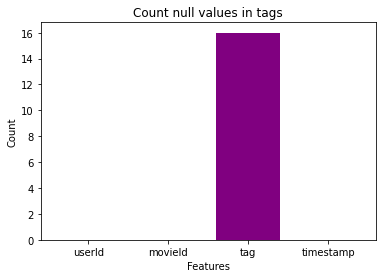

In [41]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='purple')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in tags')
plt.show()

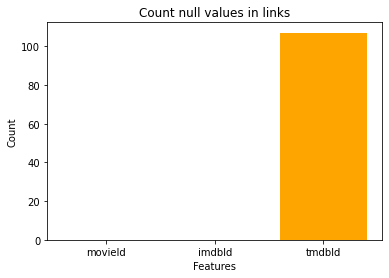

In [42]:
plt.bar(links_count.index,
        links_count.values.reshape(len(links_count), ),
        color='orange')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in links')
plt.show()

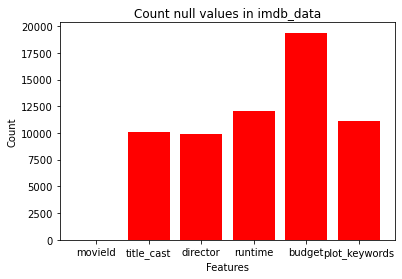

In [43]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='red')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in imdb_data')
plt.show()

As seen above, there are lots of null values in the dataset and removing the null values produce a more refined data depending on the amount of null values present. The imdb_dataset had a large amount of null values and dropping these rows would reduce the size of the dataset.

Popularity of Movie Genre

In [44]:
genres = pd.DataFrame(data['genres'].
                      str.split("|").
                      tolist(),
                      index=data['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

movieId     Genre
0    57669    Comedy
1    57669     Crime
2    57669     Drama
3    57669  Thriller
4    57669    Comedy

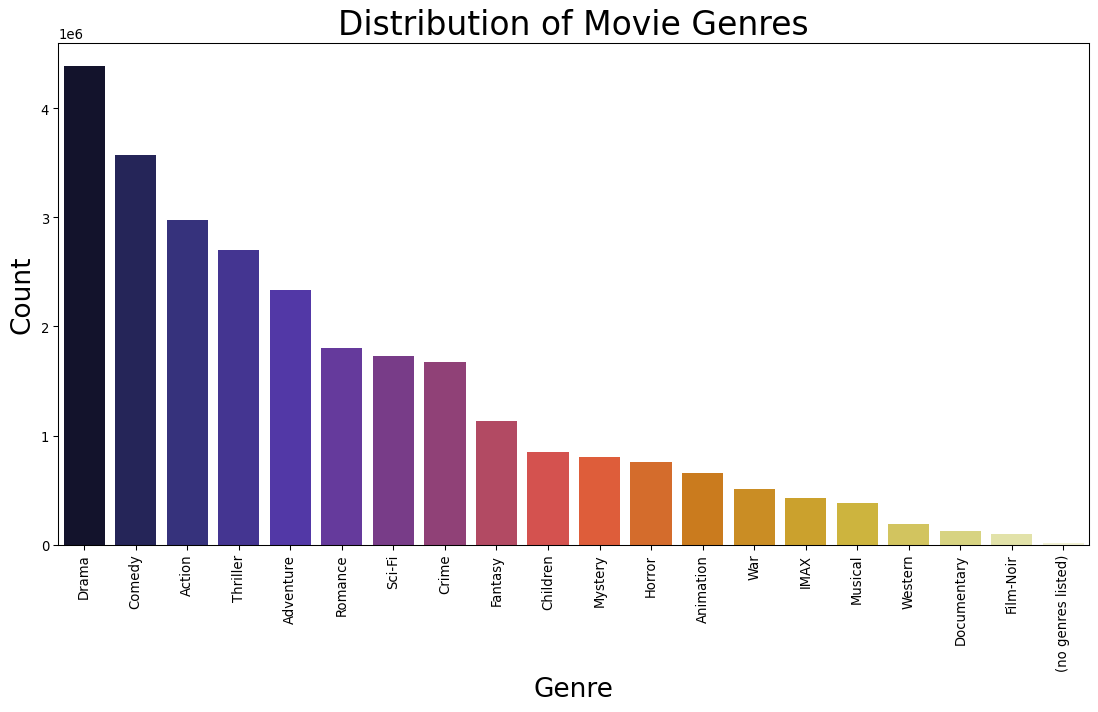

In [45]:
fig, ax = plt.subplots(figsize=(14, 7) , dpi=95)
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

Popularity of Actors

In [46]:
movies_actor = pd.DataFrame(imdb_data[['movieId', 'title_cast']],
                           columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the title_cast allocated to each movie
movies_actor= movies_actor[movies_actor['title_cast'].notnull()]
movies_actor.title_cast = movies_actor.title_cast.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-tite_cast combination is in a seperate row
movies_actor = pd.DataFrame([(tup.movieId, d) for tup in movies_actor.itertuples() for d in tup.title_cast],
                            columns=['movieId','title_cast'])

movies_actor = movies_actor.groupby(['title_cast'])['movieId'].count().reset_index(name='Number of Movies')
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=False)

#Sececting the Top 20 actors in movies
movies_actor = movies_actor .head(20)
movies_actor =movies_actor.sort_values(by='Number of Movies',ascending=True)

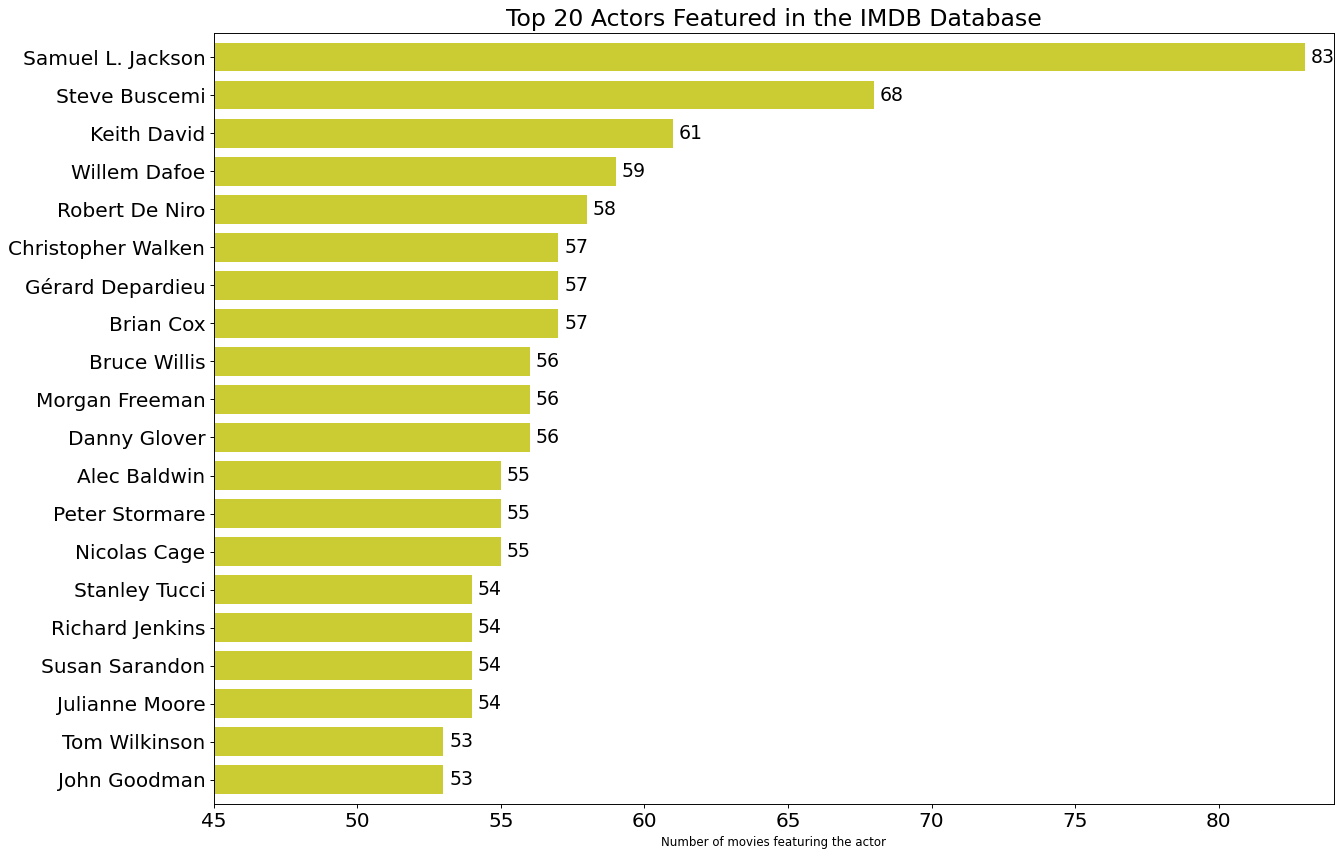

In [47]:
y_labels =movies_actor['title_cast']

# Plot the figure.
plt.figure(figsize=(17, 12),dpi =85)
ax = movies_actor['Number of Movies'].plot(kind='barh',color='y', fontsize=17,
                                           xlim=[45,84], width=.75, alpha=0.8)

ax.set_title('Top 20 Actors Featured in the IMDB Database', fontsize=20)
ax.set_xlabel('Number of movies featuring the actor')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)
rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    
    label = "{}".format(x_value)
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),fontsize=16,
                 textcoords="offset points",va='center',ha=ha)        

Top Movies

In [59]:
# Calculating avarage rating and storing the results as a DataFrame
rating = pd.DataFrame(data.groupby('movieId')['rating'].mean())
    
# Calculating total ratings count and storing the results as a DataFrame
rating['ratings_count'] = pd.DataFrame(data.groupby('movieId')['rating'].count())
rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
rating
# Joining both DataFrames
inner_join = pd.merge(rating,movies,on ='movieId',how ='inner')
popular_movies=inner_join[['title','rating','ratings_count']].rename(columns={"rating_x": "rating"})
popular_movies

title    rating  ratings_count
0      Shawshank Redemption, The (1994)  4.417624          32831
1                   Forrest Gump (1994)  4.047216          32383
2                   Pulp Fiction (1994)  4.195097          31697
3      Silence of the Lambs, The (1991)  4.144172          29444
4                    Matrix, The (1999)  4.154253          29014
...                                 ...       ...            ...
48208                    Liberté (2019)  1.000000              1
48209               Happy Flight (2008)  2.500000              1
48210         Window of the Soul (2001)  3.000000              1
48211               A Girl Thing (2001)  3.000000              1
48212    Women of Devil's Island (1962)  3.000000              1

[48213 rows x 3 columns]

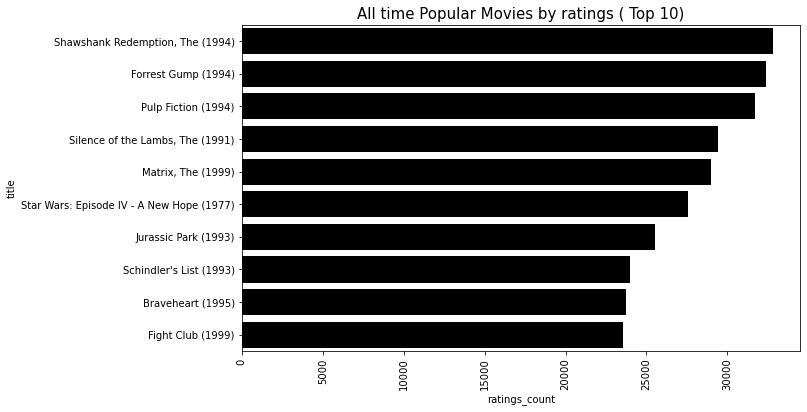

In [61]:
# Bar plot of most popular movies by ratings
plt.figure(figsize = (10,6))
ax=sns.barplot(y='title', x='ratings_count', data=popular_movies.head(10),color='black')
ax.set_title('All time Popular Movies by ratings ( Top 10)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Movie Directors

In [62]:
## grouping the movies by the director and counting the total number of movies per director
movies_director = pd.DataFrame(imdb_data[['movieId', 'director']],columns=['movieId', 'director'])

movies_director  = movies_director.groupby(['director'])['movieId'].count().reset_index(name="count")
movies_director =movies_director.sort_values(by='count',ascending=False)

movies_director = movies_director.head(20)
movies_director =movies_director.sort_values(by='count',ascending=True)

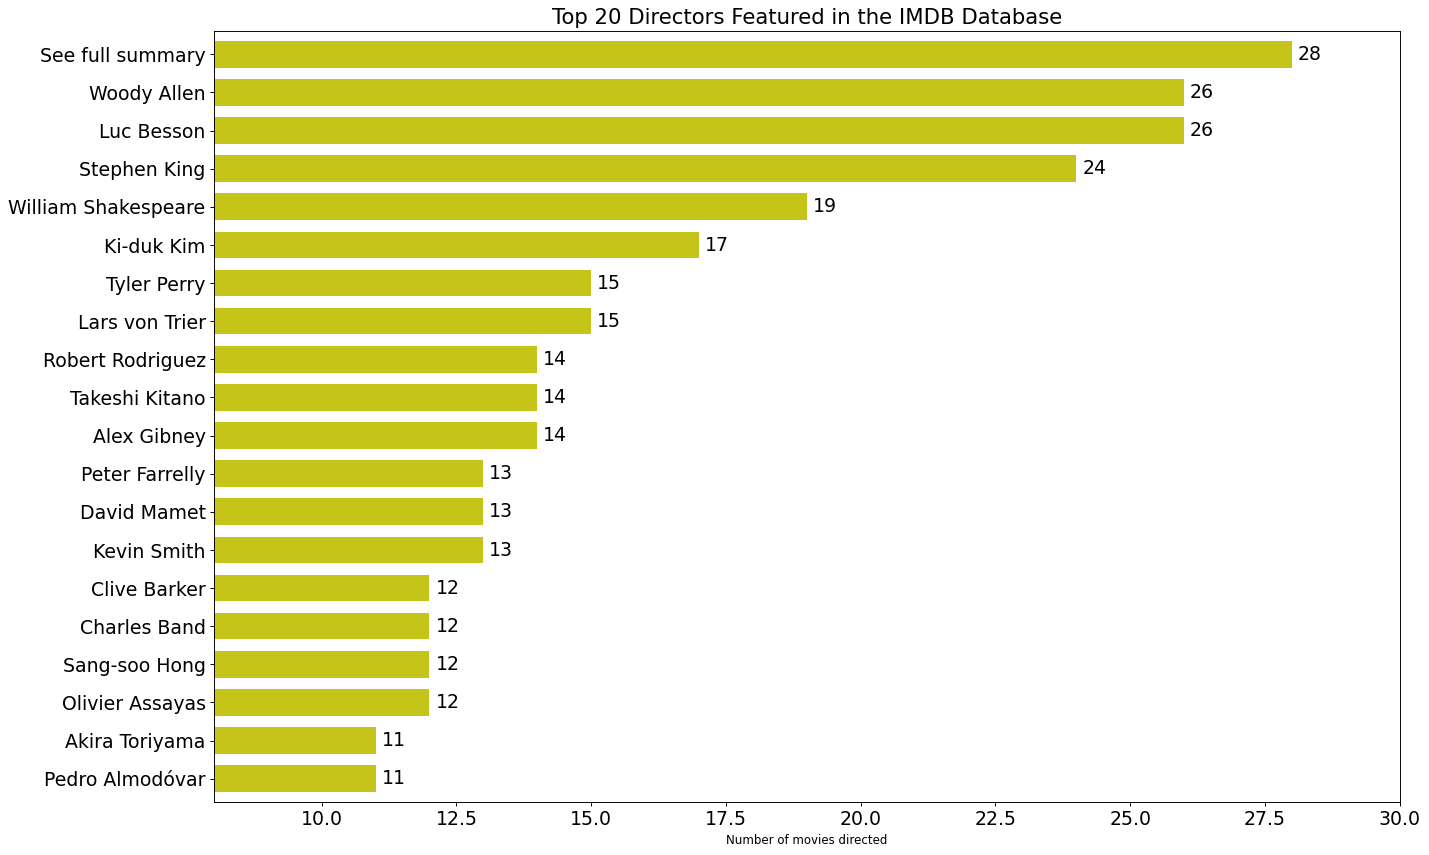

In [63]:
y_labels =movies_director['director']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi =85)
ax = movies_director['count'].plot(kind='barh',color='y',
                                   width=.7, fontsize=16, xlim=[8,30], alpha=0.9)
ax.set_title('Top 20 Directors Featured in the IMDB Database', fontsize=18)
ax.set_xlabel('Number of movies directed')
ax.set_ylabel('')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{}".format(x_value)

    # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),textcoords="offset points"
                 ,va='center',ha=ha, fontsize=16)

Movie Plays

In [64]:
movies_plot = pd.DataFrame(imdb_data[['movieId', 'plot_keywords']],
                             columns=['movieId', 'plot_keywords'])

# Split play plot seperated by "|" and create a list containing the play plot allocated to each movie
movies_plot= movies_plot[movies_plot['plot_keywords'].notnull()]
movies_plot.plot_keywords = movies_plot.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_plot = pd.DataFrame([(tup.movieId, d) for tup in movies_plot.itertuples() for d in tup.plot_keywords],columns=['movieId','plot_keywords'])

movies_plot = movies_plot.groupby(['plot_keywords'])['movieId'].count().reset_index(name="count")
movies_plot =movies_plot.sort_values(by='count',ascending=False)

movies_plot = movies_plot.head(20)
movies_plot =movies_plot.sort_values(by='count',ascending=True)

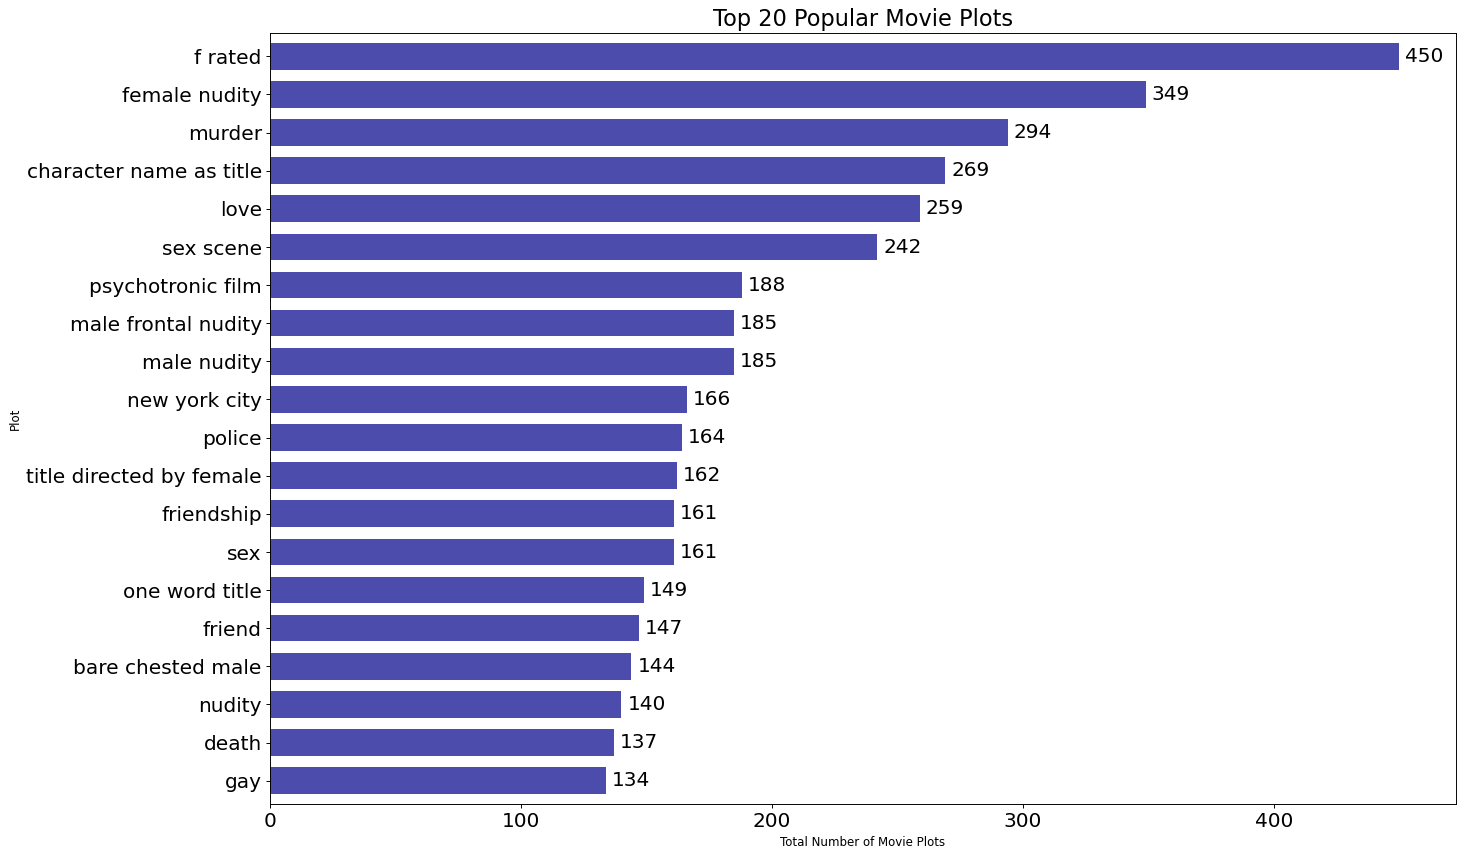

In [65]:
y_labels =movies_plot['plot_keywords']

# Plot the figure.
plt.figure(figsize=(18, 12), dpi=85)
ax = movies_plot ['count'].plot(kind='barh',color='darkblue', fontsize=17,
                                            width=.7, alpha=0.7)
ax.set_title('Top 20 Popular Movie Plots', fontsize=19)
ax.set_xlabel('Total Number of Movie Plots')
ax.set_ylabel('Plot')
ax.set_yticklabels(y_labels)

rects = ax.patches

for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    if x_value < 0:
        
        space *= -1

        ha = 'right'

    
    label = "{}".format(x_value)
    
     # Create annotation
    plt.annotate(label,(x_value, y_value),xytext=(space, 0),
                 textcoords="offset points",va='center',ha=ha, fontsize=17) 

Movies Produced Annually

In [66]:
# Create dataframe containing only the movieId and genres
movies_year = pd.DataFrame(movies[['movieId', 'title']],columns=['movieId', 'title'])

movies_year= movies_year[movies_year['title'].notnull()]
# Split the year from title
movies_year.title = movies_year.title.apply(lambda x: x[-5:-1])

movies_year = movies_year.groupby(['title'])['movieId'].count().reset_index(name="count")
movies_year =movies_year[movies_year['count'] > 500]
movies_year =movies_year.sort_values(by='count',ascending=True)

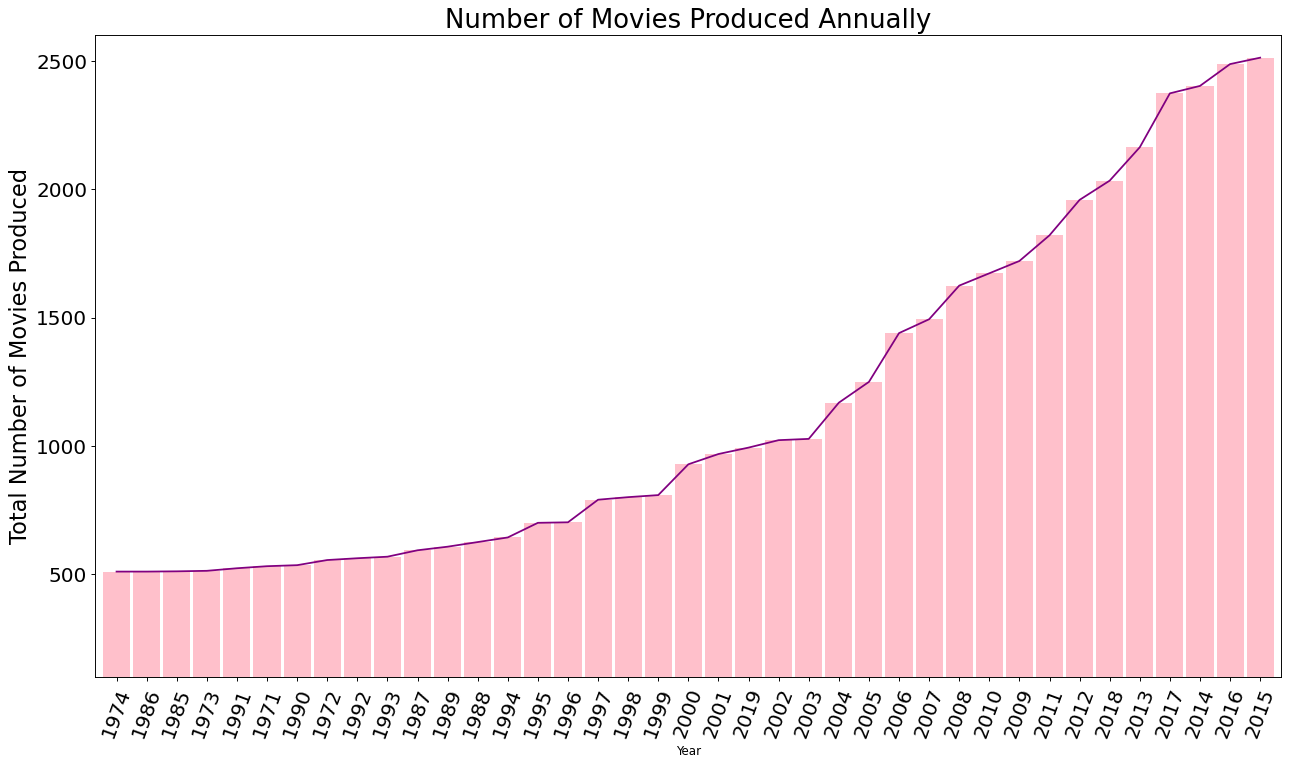

In [67]:
y_labels =movies_year['count']

# Plot the figure.
fig,ax = plt.subplots(figsize=(18, 10), dpi = 85)

movies_year[['count', 'title']].plot(x='title',kind='bar', color='pink', fontsize=17, ylim=[100, 2600],
                                           width=.9, ax=ax, legend=False)
                                     
movies_year.plot(x='title', kind = 'line', ax=ax, color='purple', legend=False)
                                     
ax.set_title('Number of Movies Produced Annually', fontsize=22)
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Movies Produced', fontsize=19)
                                     
plt.xticks(rotation=70)
plt.show()

Average Rating

In [68]:
#Create a table showcasing Average rating per movieId and the count
ratings_mean_count = pd.DataFrame(data.groupby('movieId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head()

rating  rating_counts
movieId                         
1        3.889971          23062
2        3.263414           9654
3        3.132325           4727
4        2.878099            968
5        3.059165           4648

In [69]:
#Create a table showcasing Average rating per userId and the count
ratings_mean_count = pd.DataFrame(data.groupby('userId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head()

rating  rating_counts
userId                         
1       3.910714        23062.0
2       3.416667         9654.0
3       3.691235         4727.0
4       3.308989          968.0
5       3.885714         4648.0

In [70]:
#Create a table showcasing Average rating per title and the count
avg_rating_by_title = pd.DataFrame(data.groupby(by='title')['rating'].mean())
avg_rating_by_title['rating_count']= data.groupby(by='title')['rating'].count().sort_values(ascending=False) #Number of people who rated!
avg_rating_by_title.head()

rating  \
title                                                               
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)  3.000000   
"Great Performances" Cats (1998)                         2.753731   
#1 Cheerleader Camp (2010)                               1.900000   
#Female Pleasure (2018)                                  4.000000   
#FollowMe (2019)                                         2.400000   

                                                         rating_count  
title                                                                  
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)             1  
"Great Performances" Cats (1998)                                   67  
#1 Cheerleader Camp (2010)                                          5  
#Female Pleasure (2018)                                             1  
#FollowMe (2019)                                                    5

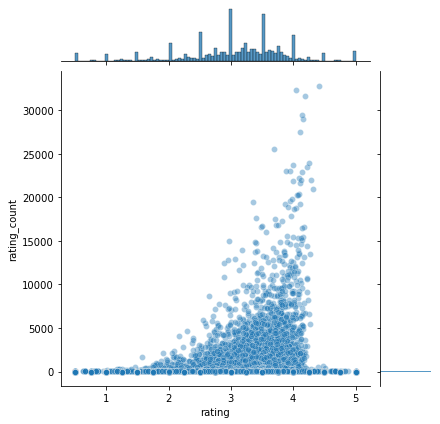

In [71]:
#Visualize the relationships between the Average Ratings and the number of people who rated a movie.
sns.jointplot(x=avg_rating_by_title['rating'], 
              y=avg_rating_by_title['rating_count'], 
              alpha=0.4)

In [72]:
train_data = train.copy()
#Counting the number of times a movie has recieved a rating
rating_count = train_data.groupby('movieId')['rating'].count().reset_index()
rating_count.rename(columns={'rating': 'movie_rating_count'}, inplace=True)
train_data = train_data.merge(rating_count, on='movieId')

In [73]:
#Counting the number of times a user has left an rating
user_count = train_data.groupby('userId')['rating'].count().reset_index()
user_count.rename(columns={'rating': 'user_rating_count'}, inplace=True)
train_data = train_data.merge(user_count, on='userId')

In [74]:
#Droping all movies/users which are below a threshhold
movie_raing_thresh = 20
user_rating_thresh = 5

train_data = train_data[train_data['movie_rating_count'] > movie_raing_thresh]
train_data = train_data[train_data['user_rating_count'] > user_rating_thresh]

display(train_data.head(3))
print(train_data.shape)
train_data.drop(['movie_rating_count', 'user_rating_count'], axis=1, inplace=True)

userId  movieId  rating   timestamp  movie_rating_count  user_rating_count
0    5163    57669     4.0  1518349992                4253                 22
1    5163     2671     1.0  1545511636                5698                 22
2    5163     1247     4.5  1434310106                7569                 22

(9848791, 6)


In [75]:
def create_features(df, column, features):
    """Creates features from a column of lists where the list items will be the features."""

    features_df = pd.DataFrame(columns=features)
    all_features = pd.concat([df, features_df], axis=1)

    for i, row in all_features.iterrows():
        for feature in features:
            if feature in getattr(row, column):
                all_features[feature].iloc[i] = 1
    all_features = all_features.drop(column, axis=1)

    return all_features

In [76]:
import re
#Fill Null Values and extract numbers from budget
imdb_data.fillna(0, inplace=True)
imdb_data.budget = imdb_data.budget.astype(str).apply(
    lambda x: int(re.sub("[^0-9]", "", x)))

Note, the cell below will take time to run.

In [77]:
%%time
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
genres = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
          'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
          'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
          'Western', 'Film-Noir', '(no genres listed)']

genre_encode = create_features(movies_genres, 'genres', genres)
genre_encode.head(4)

In [ ]:
%%time
cast = pd.DataFrame(imdb_data[['movieId', 'title_cast']],
                    columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))
cast_movie = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                          columns=['movieId', 'title_cast'])
mostc_cast = cast_movie['title_cast'].value_counts(
    ascending=False).index.tolist()[:16]

cast_encode = create_features(cast, 'title_cast', mostc_cast[1:])
cast_encode.head(4)

CPU times: total: 34.8 s
Wall time: 35.1 s


movieId Samuel L. Jackson Steve Buscemi Keith David Willem Dafoe  \
0        1               NaN           NaN         NaN          NaN   
1        2               NaN           NaN         NaN          NaN   
2        3               NaN           NaN         NaN          NaN   
3        4               NaN           NaN         NaN          NaN   

  Robert De Niro Brian Cox Christopher Walken Gérard Depardieu Bruce Willis  \
0            NaN       NaN                NaN              NaN          NaN   
1            NaN       NaN                NaN              NaN          NaN   
2            NaN       NaN                NaN              NaN          NaN   
3            NaN       NaN                NaN              NaN          NaN   

  Danny Glover Morgan Freeman Peter Stormare Alec Baldwin Nicolas Cage  \
0          NaN            NaN            NaN          NaN          NaN   
1          NaN            NaN            NaN          NaN          NaN   
2          NaN            NaN            NaN          NaN          NaN   
3          NaN            NaN            NaN          NaN          NaN   

  Susan Sarandon  
0            NaN  
1            NaN  
2            NaN  
3            NaN

Ratings Related to Specific Title

In [ ]:
#Average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().head(10)

In [ ]:
#Highest average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().sort_values(ascending=False).head(50)

Obviously, there are couple of movies with the highest ratings, which are worth watching

In [ ]:
#Count Number of people actually gave ratings to a specific movie.
data.groupby(by='title')['rating'].count().sort_values(ascending=False)

*Love on the Dole (1941)* has the Lowest Average rating, not even 5 viewers rated this movie, which cannot be recommended to watch!

In [ ]:
import chart_studio.plotly as cs
import plotly.figure_factory as ff

#Visualize the Density Plot
import plotly.express as px
df = avg_rating_by_title

fig = px.density_contour(df, x="rating", y="rating_count")
fig.show()

We can see the dark black zone in the plot which represent most no. of datapoints almost have 2 to 4 star ratings. Dark regions generally represent the Dense zones, which simply means alot of datapoints at that region

In [ ]:
#Visualize the ratings distribution
plt.figure(figsize=(12,8))
sns.distplot(avg_rating_by_title['rating'])
plt.title('Ratings Distribution')
plt.ylabel('Counts')

As seen above, the graph has Normal distribution with some negative skew.

We have enough knowledge about the trends that the data is showcasing confidence to actually create a Recommender system that suggests similar kind of movies.

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x="rating_year", y="rating" , marker=True)
plt.title('Ratings Year Distribution')

### Data Correlation

In [ ]:
# Correlation between the train_df and tags_df
corr_tag_train = pd.concat([train, tags], axis=1).corr()
corr_tag_train.head() 

In [ ]:
sns.heatmap(corr_tag_train, vmin=0,vmax=5,center=1,cmap="RdBu_r")

In [ ]:
# Finding values in the UserID columns of the tags and train dataframe.
common_userid = pd.DataFrame(train['userId'].isin(tags['userId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_userid.values.reshape(len(common_userid), ),
        color='green')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common userid between the train and tags')
plt.show()

In [ ]:
# Finding values in the MovieID columns of the tags and train data frame.
common_movieid = pd.DataFrame(train['movieId'].isin(tags['movieId']).
                          value_counts())
plt.bar(['Not Present', 'Present'],
        common_movieid.values.reshape(len(common_movieid), ),
        color='green')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

In [ ]:
# Finding values in the Timestamp columns of the tags and train.
common_timestamp = pd.DataFrame(train['timestamp'].isin(tags['timestamp']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_timestamp.values.reshape(len(common_timestamp), ),
        color='orange')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

In [ ]:
# Finding values in the MovieID columns of the links and movies data frame.
common_movieid2 = pd.DataFrame(movies['movieId'].isin(links['movieId']).
                          value_counts())
plt.bar(['Present'],
        common_movieid2.values.reshape(len(common_movieid2), ),
        color='red')
plt.xlabel('Observations')
plt.ylabel('Count_millions')
plt.title('common_attributes between the movies and links')
plt.show()

Checked for common attributes between different data frames. These attributes assist us in extending our understanding of the similarities between ratings based on: Movie Genres, Directors, Movie Budgets, Movie Titles, etc.

Based on the information provided, we able to deduce the following:

- Although the train and the tags have similiar users ID's, majority of the users are new or inconsistent raters.
- The common attributes are minimal between the train and tags.
- Although there are a few users with similiar ID's, these users have no common attributes interms of the movies watched or the length of the movies.
- The table with the most common links are the movie and the links which have common attributes in the movie ID's column.

### WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

words = ''

for x in tags['tag']:

    # typecaste each val to string
    x = str(x)

    # split the value
    tokens = x.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

In [ ]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
value_count = pd.DataFrame(tags['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)
value_count.head()

In [ ]:
common_users = train.groupby(by = 'userId')
common_users.get_group(1)
common_users.head()

## 4. Modeling<a id="model"></a>
[Table of Contents](#contents)

In [ ]:
#Preparing the dataset
train_set = train.drop(['timestamp'], axis=1)
train_set = train_set.reset_index(drop=True)

print(train_set.shape)
train_set.head()

In [ ]:
#Load Dataset
reader = Reader(rating_scale=(0.0, 5.0))
df = Dataset.load_from_df(train_set[['userId', 'movieId', 'rating']], reader)
df

In [ ]:
trainset, testset = train_test_split(df, test_size=0.10)

In [ ]:
# Modelling => Contains default parameters
algo_svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
algo_svd.fit(trainset)

predictions = algo_svd.test(testset)
rmse_svd = accuracy.rmse(predictions)
print('RMSE: ', rmse_svd)

### Cosine Similarity

In [ ]:
# Create Data Frame based on the grouping of elements by userID
avg_userid = train.groupby(by="userId", as_index=False)['rating'].mean()
rating_avg = pd.merge(train, avg_userid, on='userId')
# Calcualte difference of the Mean ratings
rating_avg['avg_rating'] = rating_avg['rating_x'] - rating_avg['rating_y']
rating_avg.head()

In [ ]:
avg_movieid = pd.DataFrame(rating_avg['movieId'].
                             value_counts()).reset_index()
avg_movieid.rename(columns={'index': 'movieId', 'movieId': 'count'},
                     inplace=True)
avg_movieid

In [ ]:
# Merge Dataframes to increase information
rating_avg = pd.merge(avg_movieid, rating_avg, on='movieId')
rating_avg.head()

In [ ]:
# To preserve disk memory, only include ratings above 1000 per user.
rating_avg = rating_avg[rating_avg['count'] > 1000]
rating_avg.head()

In [ ]:
rating_avg.groupby('movieId')['avg_rating'].count().sort_values(ascending=False).head()

In [ ]:
data[data['movieId']== 318]['title'].head()

In [ ]:
count_df = pd.DataFrame(train['movieId'].value_counts()).reset_index()
count_df.rename(columns = {'index':'movieId','movieId' : 'count'}, inplace = True)
count_df

In [ ]:
train_count =pd.merge(count_df, train ,on='movieId')
train_count.head()

In [ ]:
filter_user = train_count[train_count['count']>10000]
filter_user.head()

In [ ]:
from surprise import Reader
from surprise import Dataset
reader = Reader(rating_scale=(0, 5))
model_data = Dataset.load_from_df(filter_user[['movieId',
                                         'userId',
                                         'rating']],
                            reader)

### 4.1 Modeling 1<a id="imbalancedata"></a>
[Table of Contents](#contents)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [NormalPredictor(),
                  KNNBaseline(),
                  KNNBasic(),
                  KNNWithMeans(),
                  KNNWithZScore(),
                  BaselineOnly(),
                  CoClustering(),
                  SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, model_data, measures=['RMSE'],
                             cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).
                                split(' ')[0].
                                split('.')[-1]],
                               index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
# Training and validation set split for hypertuning

train_set = model_data.build_full_trainset()
# train_set, val_set = train_test_split(data, test_size=0.008, random_state=42)

# Modelling of the SVD hypertuning
algo = SVD(n_factors=300, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=40,
                     init_std_dev=0.01)
algo.fit(train_set)

# Predicting on the validation set
# svd_hyper_predictions = algo.test(val_set)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
# metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}


#### 4.1.1 Hyperparameter Tuning<a id="withoutresample"></a>
[Table of Contents](#contents)

In [ ]:
# We are using the full train dataframe because we dont need to sample to save time.
model_train = train.copy()
model_train.rename(columns={'userId': 'user', 'movieId': 'item', 'rating': 'label',
                               'timestamp': 'time'}, inplace=True)

In [ ]:
# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(
    model_train, multi_ratios=[0.99, 0.005, 0.005])

In [ ]:
# building data sets
train_data, data_info = DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)
print(data_info)

In [ ]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_WARNINGS"] = "FALSE"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

In [ ]:
reset_state('libSVD')
svd_lib = libSVD(task="rating", data_info=data_info, embed_size=16, n_epochs=20, lr=0.004, batch_size=9000,
                 batch_sampling=True, reg=0.000001, num_neg=-5)  
# monitor metrics on eval_data during training
svd_lib.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
metrics = evaluate(model=svd_lib, data=test_data, metrics=["rmse", "mae"])
print("evaluate_result: ", metrics)

This model performs well, being trained on the entire dataset, the exection time is 5 minutes on 20 epochs and gives us a very good RMSE of 0.8005 on the test set.

We can predict the rating a user might give a movie by calling the predict function. We can also reccomend movies to a user by specifying that users userId and the number of recommendations into the libreccomender recommend_user function.

In [ ]:
prediction = svd_lib.predict(user=5163, item=318)
recommendation = svd_lib.recommend_user(user=5163, n_rec=5)
print("prediction: ", prediction[0])

rec = []
ratings = []
recommended_movies = movies.copy()

for r in recommendation:
    rec.append(r[0])
    ratings.append(r[1])
    
recommended_movies = recommended_movies[recommended_movies['movieId'].isin(rec)].set_index('movieId').copy()
recommended_movies['rating'] = ratings

print('User 5163 will be recommended:')
display(recommended_movies.sort_values('rating', ascending =False))

In [ ]:
gc.collect()
del data, svd_lib
sleep(10)

In [ ]:
reset_state('SVDpp')
svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2,
              lr=0.0048, batch_size=10000,
              batch_sampling=True, reg=0.000001, num_neg=-5)

svdpp.fit(train_data, verbose=2, eval_data=eval_data,
          metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
metrics2= evaluate(model=svdpp, data=test_data, metrics=["rmse", "mae"])
print("evaluate_result: ", metrics2)

The SVDpp from LibReccomender seems very robust, the more epochs we give it the better the test set RMSE. We have chosen 8 epochs in the end as RMSE drops to a nice 0.798 and the exection time per epoch is only 10min when running on google collab and 15min when run elsewhere.

In [ ]:
def create_submission(algo, save_name):

    ratings_predictions = [algo.predict(
        row.userId, row.movieId) for _, row in test.iterrows()]
    df_pred = pd.DataFrame(ratings_predictions)
    df_pred = df_pred.rename(
        columns={'uid': 'userId', 'iid': 'movieId', 'est': 'rating'})
    df_pred.drop(['r_ui', 'details'], axis=1, inplace=True)
    # Create ID column
    df_pred['Id'] = df_pred.apply(
        lambda x: '%s_%s' % (x['userId'], x['movieId']), axis=1)
    df_pred['Id'] = df_pred.apply(
        lambda x: '%s_%s' % (x['userId'], x['movieId']), axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)

    return pd.read_csv('./' + save_name + '.csv')


def create_librec_submission(svdpp, save_name):
    svdpp_pred = svdpp.predict(
        test['userId'], test['movieId'], cold_start="popular")
    df_pred = test.copy()
    df_pred['rating'] = svdpp_pred
    df_pred['Id'] = df_pred.apply(
        lambda x: '%s_%s' % (x['userId'], x['movieId']), axis=1)
    df_pred['Id'] = df_pred.apply(
        lambda x: '%s_%s' % (x['userId'], x['movieId']), axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)
    return pd.read_csv('./' + save_name + '.csv')

In [ ]:
%%time

data = train.copy()
data.rename(columns={'userId': 'user', 'movieId': 'item', 'rating': 'label',
                               'timestamp': 'time'}, inplace=True)

train_data, data_info = DatasetPure.build_trainset(data)

reset_state('SVDpp')
svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, reg=0.000001, num_neg=-5,
              n_epochs=8, lr=0.0048, batch_size=10000, batch_sampling=True)
              
svdpp.fit(train_data, verbose=2)


In [ ]:
%%time

submission = create_librec_submission(svdpp, 'engine_svdpp')
submission.head(10)

#### 4.1.2 Algorithm 2<a id="upsample"></a>
[Table of Contents](#contents)

#### 4.1.3 Algorithm 3<a id="downsample"></a>
[Table of Contents](#contents)

#### 4.1.4 Algorithm 4<a id="smote"></a>
[Table of Contents](#contents)

### 4.2 Model Evaluation<a id="modeltraining"></a>
[Table of Contents](#contents)

### Collaborative Model Assessment
We cannot realy compare use the execution time for the comparing of the SVD and SVDpp here because the models are very robust and the more epochs we decide to give it, the better the model accuracy but greater the execution time. So depending on the situation, we could go for either.

Currently, from the number of epochs we ran, the LibReccomender SVDpp algorithm offers the best predictive ability. We will train the algorithm on the full training dataset and later use the model to predict the ratings for a test dataset containing, for the most part, familiar userId/movieId pairs

#### 4.2.1 Model Saving<a id="logisticregression"></a>
[Table of Contents](#contents)

In [ ]:
#Save model

data_info.save(path="engine_svdpp_model")
svdpp.save(path="engine_svdpp_model", model_name="engine_model", manual=True,
                inference_only=False)

NameError: name 'data_info' is not defined

In [ ]:
tf.compat.v1.reset_default_graph()
data_info = DataInfo.load("engine_svdpp_model")

pre_trained_model = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, 
                                                lr=0.005,batch_size=10000, batch_sampling=True)

data = pd.read_csv('datasets/train.csv', header=0, names = ["user", "item", "label", "time"])
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])
train_data, data_info = DatasetPure.build_trainset(train_data)
pre_trained_model.rebuild_graph(path="engine_svdpp_model", model_name="engine_model",
                        full_assign=True, train_data=train_data)

pre_trained_model.predict(train['userId'][:10], train['movieId'][:10])

#### 4.2.2 Submission <a id="naivebayes"></a>
[Table of Contents](#contents)

In [ ]:
submission_data = [algo_svd.predict(row.userId, row.movieId) for _,row in test_data.iterrows()]
df_pred = pd.DataFrame(submission_data)
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
#Change positioning of columns
df_pred = df_pred[['Id', 'rating']]
# Create Submission file
df_pred.to_csv("engine.csv", index=False)
df_pred

NameError: name 'test_data' is not defined

In [ ]:
svd_params = dict(n_factors=100, n_epochs=20,
                  lr_all=0.005, reg_all=0.02)

lr_params = dict(fit_intercept=True, normalize=False,
                 copy_X=True, n_jobs=None)

baselineOnly_params = dict(verbose =True)

knnbaseline_params = dict(k=40, min_k=1, sim_options={},
                          bsl_options={}, verbose=True) 

knnwithmeans_params = dict(k=40, min_k=1,
                           sim_options={}, verbose=True)

knnwithzscore_params = dict(k=40, min_k=1,
                            sim_options={}, verbose=True)
                            
knnbasic_params = dict(k=40, min_k=1,
                       sim_options={}, verbose=True)

In [ ]:
params = {'model type': 'SVD',
          'scaler': 'standard scaler',
          'params': str(svd_params),
          'model type': 'Linear Regression',
          'params': str(lr_params),
          'model type': 'Baseline Only',
          'params': str(baselineOnly_params),
          'model type': 'KNNBaseline',
          'params': str(knnbaseline_params),
          'model type': 'KNNWithMeans',
          'params': str(knnwithmeans_params),
          'model type': 'KNNWithZScore',
          'params': str(knnwithzscore_params),
          'model type': 'KNNBasic',
          'params': str(knnbasic_params),
          'stratify': True
          }

In [ ]:
metrics = {'RMSE_SVD': rmse_svd,
           'RMSE_LR': lr_rmse,
           'RMSE_BaselineOnly': baseline_rmse,
           'RMSE_Cosine': CF_cosine,
           'KNNBaesline': kNNBaseline,
           'KNNWithMeans': kNNWithMeans,
           'KNNWithZScore': kNNWithZScore,
           'KNNBasic': kNNBasic,
           'CoClustering': coClustering,
           'Normal': normal
           }

NameError: name 'rmse_svd' is not defined

#### 4.2.3 Evaluation 3<a id="linearsvc"></a>
[Table of Contents](#contents)

## 5. Conclusion and Recommendation<a id="conclusion_and_recommendation"></a>
[Table of Contents](#contents)

### 5.1 Conclusion<a id="conclusion"></a>
[Table of Contents](#contents)

### 5.2 Recommendation<a id="recommendation"></a>
[Table of Contents](#contents)

## 6. References<a id="references"></a>
[Table of Contents](#contents)